# Cluster de usuarios por dominio

## Librerias

In [47]:
from matplotlib import pyplot as plt
import pandas as pd

## Carga de tablas

In [133]:
#Una muestra de la tabla se encuentra en /data
trafico = pd.read_json("entrenamiento.json")

In [134]:
trafico['recv'] = trafico['recv'] / trafico['numClients'] 
trafico['sent'] = trafico['sent'] / trafico['numClients'] 

## Graficando la informacion

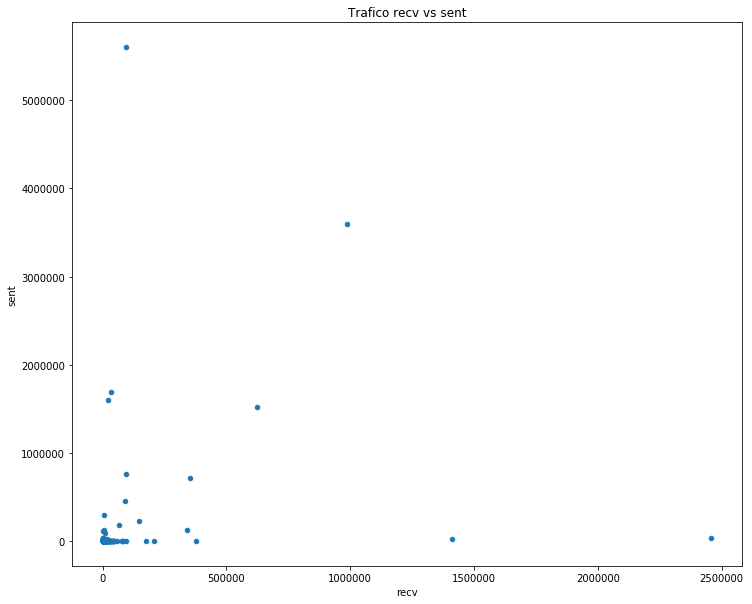

In [136]:
trafico.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

## Haciendole un corte a la informacion

In [137]:
 trafico[(trafico['recv'] > 1420000 )|(trafico['sent'] > 500000)]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent
1,37140,Miscellaneous web,10.22.251.136,11995,1,80,TCP,95171.0,5603912.0
2,37080,Miscellaneous web,10.22.251.139,10122,1,80,TCP,32661.0,1690025.0
3,35460,Miscellaneous web,10.22.251.155,6574,1,80,TCP,22461.0,1603737.0
50,38040,Miscellaneous secure web,10.22.251.136,39028,1,443,TCP,623940.0,1515693.0
51,37680,Miscellaneous secure web,10.22.251.139,62159,1,443,TCP,988976.0,3597428.0
52,37260,Miscellaneous secure web,10.22.251.155,20747,1,443,TCP,93153.0,761233.0
192,29940,UDP,10.22.251.139,3353,1,443,UDP,353871.0,716669.0
204,29580,Software updates,b1.download.windowsupdate.com,3380,2,80,TCP,2458071.5,39438.0


In [138]:
trafico_sn_outlayers = trafico[(trafico['recv'] <= 1420000 )&(trafico['sent'] <= 500000)]

### Graficando primer paso 'sin' outlayers

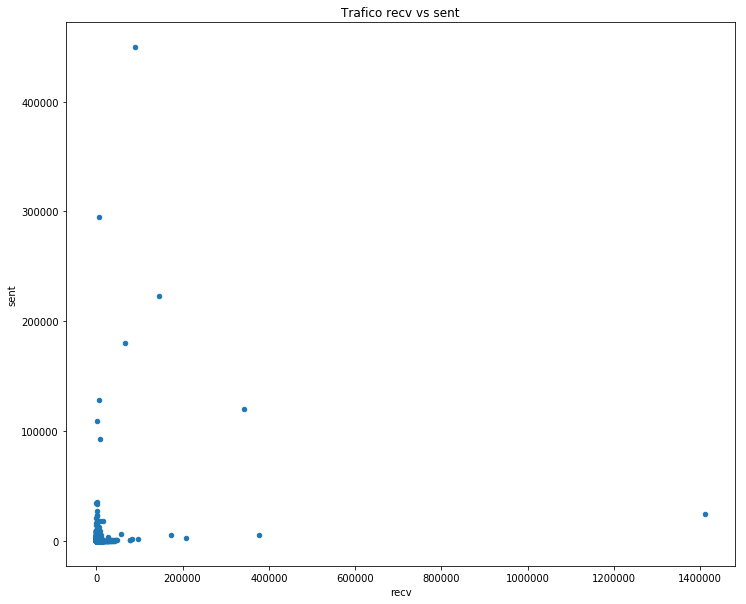

In [139]:
trafico_sn_outlayers.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

## K clustering para categorizar

In [140]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(trafico_sn_outlayers[['recv','sent']])
# Getting the cluster labels
labels = kmeans.predict(trafico_sn_outlayers[['recv','sent']])
# Centroid values
centroids = kmeans.cluster_centers_
trafico_sn_outlayers['color']= labels

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


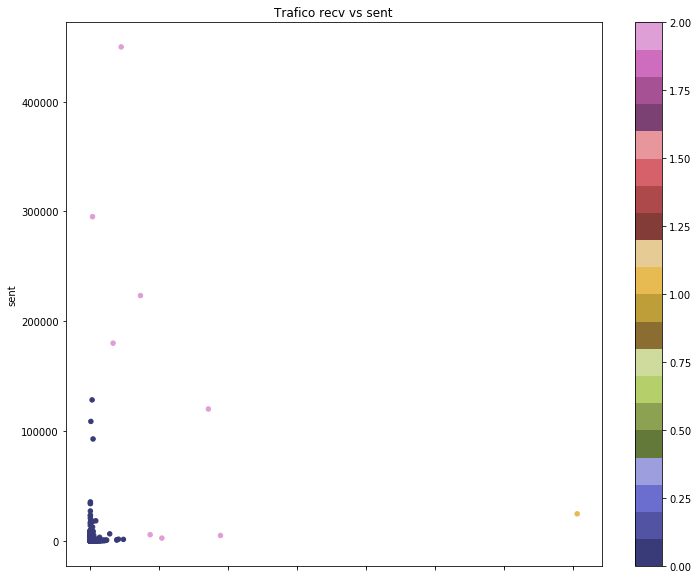

In [141]:

cm = plt.cm.get_cmap('tab20b')
trafico_sn_outlayers.plot.scatter(x="recv",y="sent",figsize=(12,10),c=labels,cmap = cm)
plt.title('Trafico recv vs sent')
plt.show()

In [142]:
trafico_sn_outlayers[trafico_sn_outlayers['color']  == 1 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
22,540,Miscellaneous web,fota-s3-dn.ospserver.net,2,1,80,TCP,1411107.0,24807.0,1


In [143]:
trafico_sn_outlayers[trafico_sn_outlayers['color']  == 2 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
0,17580,Miscellaneous web,10.22.242.213,1654,1,80,TCP,6802.0,295224.0,2
20,4320,Miscellaneous web,download.mcafee.com,41,1,80,TCP,377581.0,5107.0,2
49,29280,Miscellaneous secure web,10.22.242.213,10849,1,443,TCP,89829.0,449750.0,2
180,7260,Non-web TCP,10.22.250.153,255,1,30001,TCP,173767.0,5806.0,2
191,24180,UDP,10.22.251.136,2119,1,443,UDP,342531.0,120226.0,2
193,16260,UDP,10.22.251.155,1396,1,443,UDP,66353.0,180140.0,2
255,129480,Google HTTPS,None,44087,4,-,-,145662.5,223446.5,2
578,540,Miscellaneous secure web,adaptive-streaming.udemy.com,9,1,443,TCP,207748.0,2735.0,2


## Graficando secci'on de interes

In [144]:
trafico_filtrado = trafico_sn_outlayers[trafico_sn_outlayers['color']  == 0 ]

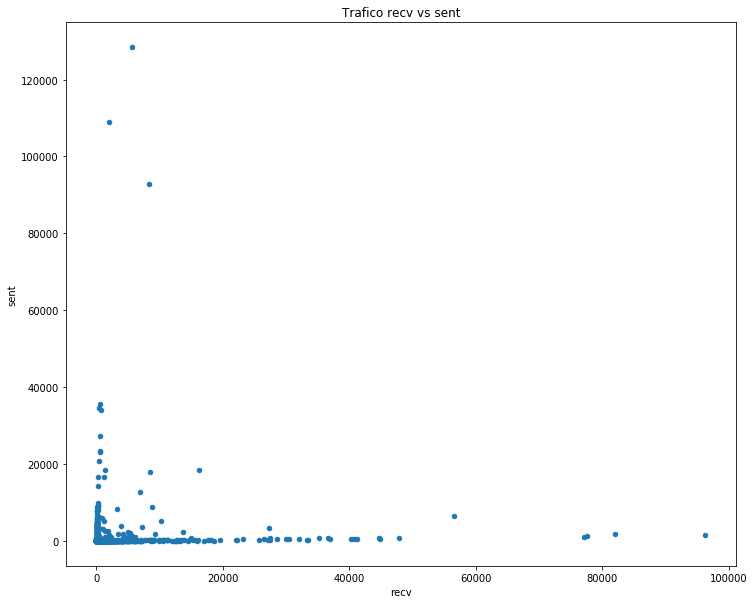

In [145]:
trafico_filtrado.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

In [146]:
trafico_filtrado[trafico_filtrado['recv']  >= 50000 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
42,300,Miscellaneous web,updates-http.cdn-apple.com,3,1,80,TCP,77554.0,1207.000000,0
76,360,Miscellaneous secure web,dfw02.hls.ttvnw.net,16,1,443,TCP,96292.0,1560.000000,0
77,420,Miscellaneous secure web,dl.tvcdn.de,1,1,443,TCP,82012.0,1735.000000,0
190,2700,UDP,10.22.242.213,129,1,443,UDP,56623.0,6586.000000,0
203,8340,Software updates,au.download.windowsupdate.com,404,3,80,TCP,77094.0,971.666667,0


In [147]:
trafico_filtrado[trafico_filtrado['sent']  >= 40000 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
14,13080,Miscellaneous web,b1.download.windowsupdate.com,456,3,80,TCP,5593.0,128486.0,0
31,720,Miscellaneous web,itunes.apple.com,9,1,80,TCP,2037.0,108921.0,0
201,73740,Meraki HTTPS,None,3949,2,-,-,8346.0,92937.5,0


In [148]:
trafico_small = trafico_filtrado[(trafico_filtrado['recv'] <= 50000 )&(trafico_filtrado['sent'] <= 40000)]

In [149]:
trafico_small

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
4,660,Miscellaneous web,189.194.232.194,18,1,80,TCP,33475.000000,377.000000,0
5,900,Miscellaneous web,189.198.130.25,35,1,80,TCP,41234.000000,480.000000,0
6,60,Miscellaneous web,201.174.231.74,2,1,80,TCP,1178.000000,15.000000,0
7,120,Miscellaneous web,67.24.193.254,3,1,80,TCP,2492.000000,19.000000,0
8,540,Miscellaneous web,8.248.65.254,18,1,80,TCP,4775.000000,70.000000,0
9,120,Miscellaneous web,akamai.net,25,2,80,TCP,27483.500000,860.000000,0
10,60,Miscellaneous web,akronestadio.mx,22,1,80,TCP,3079.000000,42.000000,0
11,60,Miscellaneous web,appldnld.apple.com,1,1,80,TCP,225.000000,9200.000000,0
12,60,Miscellaneous web,appldnld.g.aaplimg.com,2,1,80,TCP,871.000000,19.000000,0
13,60,Miscellaneous web,au.download.windowsupdate.com,1,1,80,TCP,59.000000,3469.000000,0


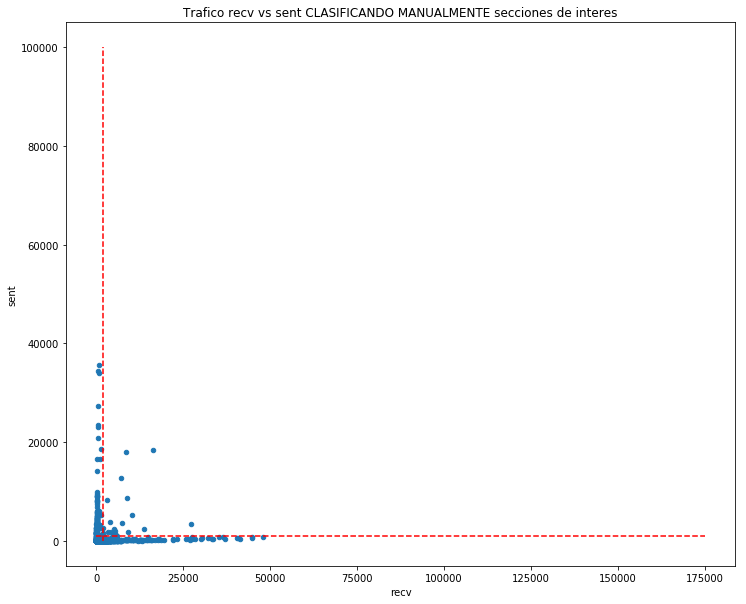

In [150]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


    
trafico_small.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.plot([0,175000], [1000,1000], "r--")
plt.plot([2000,2000], [0,100000], "r--")

plt.title('Trafico recv vs sent CLASIFICANDO MANUALMENTE secciones de interes')
plt.show()

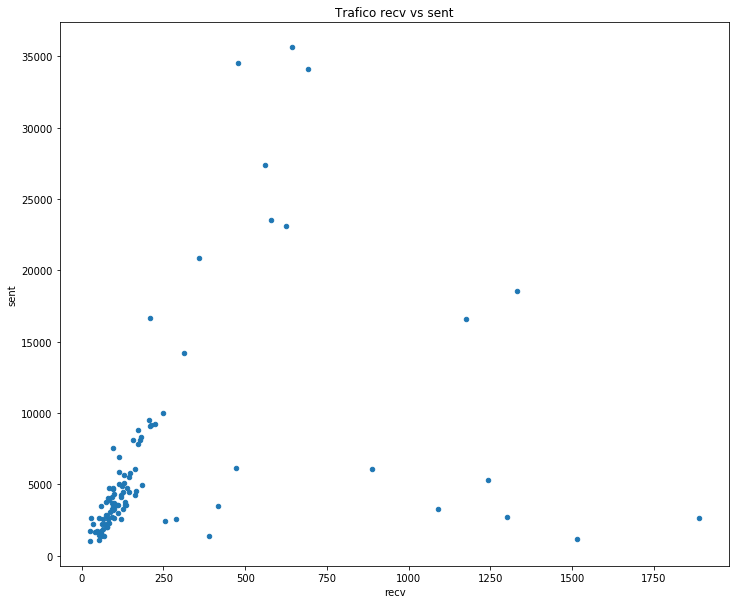

In [151]:
trafico_new_b = trafico_small[(trafico_small['recv'] <= 2000 )&(trafico_small['sent'] > 1000 )]
trafico_new_b.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()


In [152]:
trafico_new_b

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
11,60,Miscellaneous web,appldnld.apple.com,1,1,80,TCP,225.000000,9200.000000,0
13,60,Miscellaneous web,au.download.windowsupdate.com,1,1,80,TCP,59.000000,3469.000000,0
19,1680,Miscellaneous web,delivery.mp.microsoft.com,60,2,80,TCP,1176.000000,16576.500000,0
46,60,Miscellaneous web,www.google.com,1,1,80,TCP,36.000000,2227.000000,0
48,120,Miscellaneous secure web,*.tvcdn.de,1,1,443,TCP,693.000000,34069.000000,0
62,300,Miscellaneous secure web,blobstore-apple.com.akadns.net,3,1,443,TCP,207.000000,9480.000000,0
68,540,Miscellaneous secure web,cl1.apple.com,9,1,443,TCP,360.000000,20861.000000,0
69,600,Miscellaneous secure web,cl2.apple.com,9,1,443,TCP,624.000000,23124.000000,0
75,120,Miscellaneous secure web,crashlogs.whatsapp.net,2,2,443,TCP,27.000000,1032.000000,0
83,60,Miscellaneous secure web,file-us-10-246-65-152.file.samsungcloud.com,1,1,443,TCP,144.000000,5510.000000,0


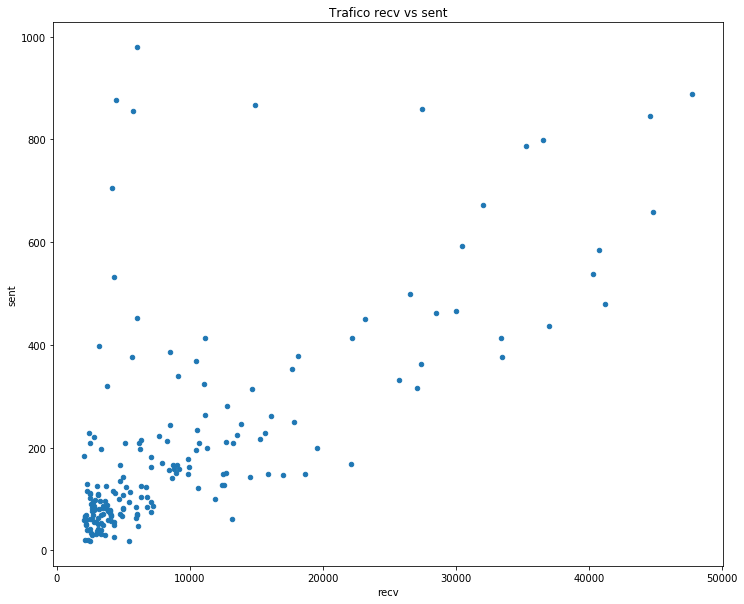

In [153]:
trafico_new_a = trafico_small[(trafico_small['sent'] <= 1000 )&(trafico_small['recv'] > 2000 )]
trafico_new_a.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()


In [154]:
trafico_new_a

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
4,660,Miscellaneous web,189.194.232.194,18,1,80,TCP,33475.000000,377.000000,0
5,900,Miscellaneous web,189.198.130.25,35,1,80,TCP,41234.000000,480.000000,0
7,120,Miscellaneous web,67.24.193.254,3,1,80,TCP,2492.000000,19.000000,0
8,540,Miscellaneous web,8.248.65.254,18,1,80,TCP,4775.000000,70.000000,0
9,120,Miscellaneous web,akamai.net,25,2,80,TCP,27483.500000,860.000000,0
10,60,Miscellaneous web,akronestadio.mx,22,1,80,TCP,3079.000000,42.000000,0
15,480,Miscellaneous web,bigota.d.miui.com,6,1,80,TCP,44640.000000,845.000000,0
16,120,Miscellaneous web,captive.apple.com,2,2,80,TCP,40339.500000,537.500000,0
17,60,Miscellaneous web,cdn.appexnw.com,1,1,80,TCP,22137.000000,169.000000,0
18,240,Miscellaneous web,clientconfig.akamai.steamstatic.com,53,1,80,TCP,25722.000000,332.000000,0


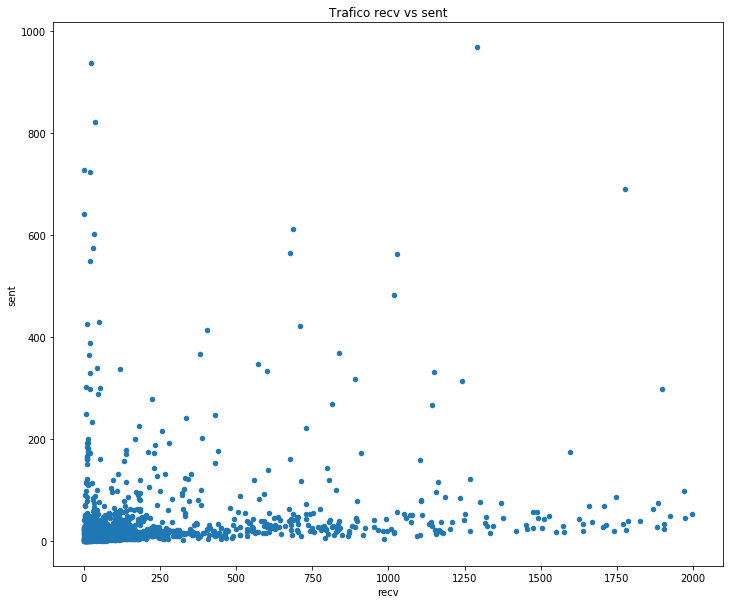

In [155]:
trafico_new_c = trafico_small[(trafico_small['sent'] < 1000 )&(trafico_small['recv'] < 2000 )]
trafico_new_c.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()


In [156]:
trafico_new_c

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
6,60,Miscellaneous web,201.174.231.74,2,1,80,TCP,1178.000000,15.000000,0
12,60,Miscellaneous web,appldnld.g.aaplimg.com,2,1,80,TCP,871.000000,19.000000,0
23,60,Miscellaneous web,fp-vp.azureedge.net,9,1,80,TCP,1906.000000,23.000000,0
24,60,Miscellaneous web,iecvlist.microsoft.com,1,1,80,TCP,846.000000,12.000000,0
35,120,Miscellaneous web,mpak-suse1.akamaized.net,2,1,80,TCP,1771.000000,34.000000,0
38,60,Miscellaneous web,r2---sn-hxb5j5cax-bqas.gvt1.com,1,1,80,TCP,986.000000,5.000000,0
47,8220,Miscellaneous web,www.google.com.mx,175,9,80,TCP,817.000000,28.888889,0
59,8340,Miscellaneous secure web,avatars.schd.ws,2079,46,443,TCP,1969.065217,98.586957,0
61,60,Miscellaneous secure web,blob.core.windows.net,4,1,443,TCP,38.000000,822.000000,0
63,13440,Miscellaneous secure web,cabify.com,360,34,443,TCP,534.823529,38.970588,0


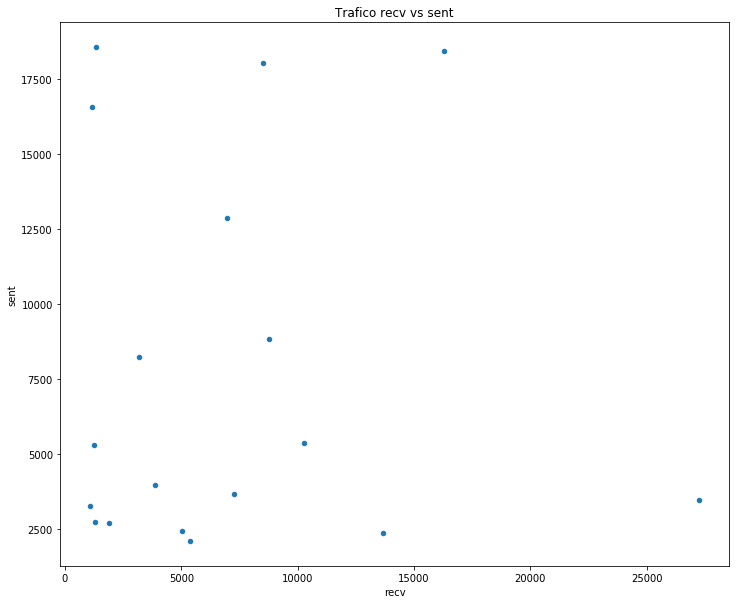

In [157]:
trafico_new_d = trafico_small[(trafico_small['sent'] > 2000 )&(trafico_small['recv'] > 1000 )]
trafico_new_d.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

In [158]:
trafico_new_d

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
19,1680,Miscellaneous web,delivery.mp.microsoft.com,60,2,80,TCP,1176.000000,16576.500000,0
81,5580,Miscellaneous secure web,elrio.mx,167,1,443,TCP,13653.000000,2356.000000,0
85,240,Miscellaneous secure web,file-us-10-246-72-146.file.samsungcloud.com,2,2,443,TCP,8781.500000,8816.500000,0
105,3420,Miscellaneous secure web,googlevideo.com,60,4,443,TCP,16305.250000,18455.250000,0
109,120,Miscellaneous secure web,lax03.hls.ttvnw.net,3,2,443,TCP,3853.000000,3947.000000,0
144,1800,Miscellaneous secure web,r5---sn-hxb5j5cax-bqae.gvt1.com,34,5,443,TCP,27247.600000,3464.600000,0
179,1800,Non-web TCP,10.22.251.139,750,1,143,TCP,1332.000000,18576.000000,0
184,300,Non-web TCP,10.22.251.155,10,1,8080,TCP,8529.000000,18050.000000,0
185,300,Non-web TCP,speedtest.megared.net.mx,14,3,8080,TCP,10275.666667,5352.000000,0
186,660,UDP,10.22.251.136,13,1,1194,UDP,1243.000000,5292.000000,0


### Enfocando solo al segmento interesante

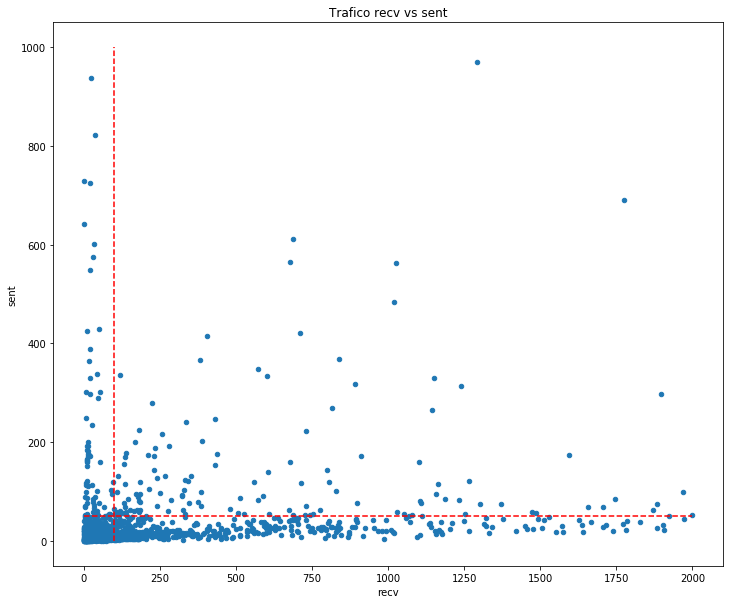

In [159]:
trafico_new_left = trafico_new_c
trafico_new_left.plot.scatter(x="recv",y="sent",figsize=(12,10))

plt.plot([0,2000], [50,50], "r--")
plt.plot([100,100], [0,1000], "r--")

plt.title('Trafico recv vs sent')
plt.show()


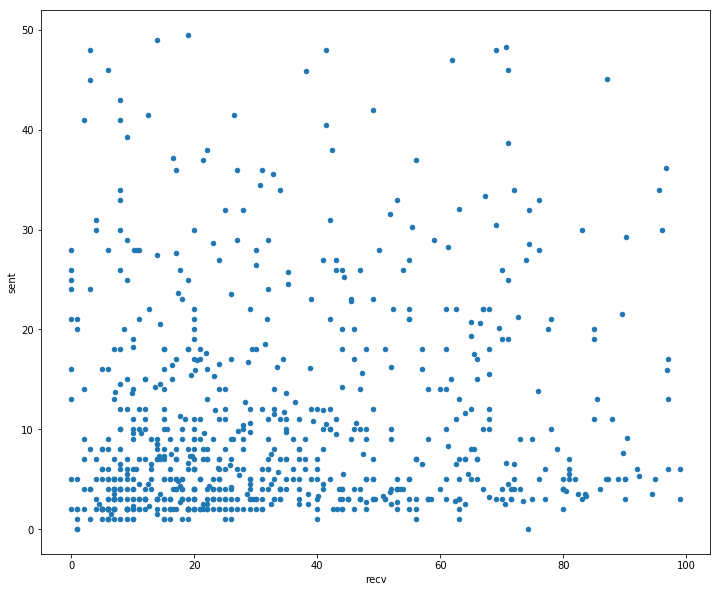

In [160]:
trafico_new_left_inferior =  trafico_new_left[(trafico_new_left['sent'] < 50 )&(trafico_new_left['recv'] < 100 )]

trafico_new_left_inferior.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.show()

In [161]:
trafico_new_left_inferior.sort('numClients',ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
1490,36600,ICMP,10.128.128.128,243,167,-,ICMP,74.329341,0.000000,0
839,16860,Miscellaneous secure web,edge-mqtt.facebook.com,326,59,443,TCP,20.135593,15.898305,0
1129,4380,Miscellaneous secure web,portal.fb.com,113,49,443,TCP,87.122449,45.122449,0
1133,2460,Miscellaneous secure web,pps.whatsapp.net,36,29,443,TCP,67.896552,3.172414,0
818,3660,Miscellaneous secure web,e.crashlytics.com,118,25,443,TCP,21.920000,17.600000,0
821,2160,Miscellaneous secure web,e1.whatsapp.net,25,21,443,TCP,41.000000,11.904762,0
832,2760,Miscellaneous secure web,e5.whatsapp.net,22,20,443,TCP,51.900000,31.550000,0
941,1500,Miscellaneous secure web,graph.accountkit.com,52,20,443,TCP,95.550000,33.950000,0
830,4200,Miscellaneous secure web,e3.whatsapp.net,28,19,443,TCP,23.368421,11.947368,0
828,2340,Miscellaneous secure web,e16.whatsapp.net,22,18,443,TCP,38.888889,16.166667,0


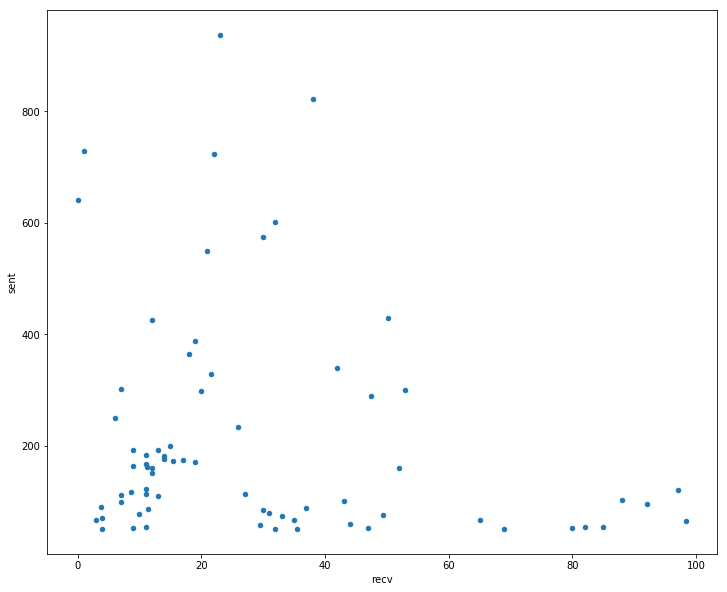

In [162]:
trafico_new_left_izuiqeda =  trafico_new_left[(trafico_new_left['sent'] > 50 )&(trafico_new_left['recv'] < 100 )]

trafico_new_left_izuiqeda.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.show()

In [163]:
trafico_new_left_izuiqeda.sort('numClients',ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
1208,2400,Miscellaneous secure web,reports.crashlytics.com,33,22,443,TCP,11.363636,86.227273,0
822,2520,Miscellaneous secure web,e10.whatsapp.net,21,16,443,TCP,35.500000,51.687500,0
612,3060,Miscellaneous secure web,api.instabridge.com,216,10,443,TCP,98.400000,65.200000,0
1516,1140,Non-web TCP,e11.whatsapp.net,18,9,5222,TCP,82.111111,54.111111,0
1089,480,Miscellaneous secure web,notify.bugsnag.com,10,7,443,TCP,11.285714,161.428571,0
1634,360,UDP,mobilemaps-pa.googleapis.com,8,6,443,UDP,50.166667,430.166667,0
1234,600,Miscellaneous secure web,sc-analytics.appspot.com,6,6,443,TCP,8.666667,116.833333,0
849,1560,Miscellaneous secure web,etl.tindersparks.com,18,5,443,TCP,30.000000,84.800000,0
1689,660,Software updates,fe2.update.microsoft.com,10,4,443,TCP,47.500000,289.000000,0
368,360,Miscellaneous web,mistat.intl.xiaomi.com,7,4,80,TCP,3.750000,90.000000,0


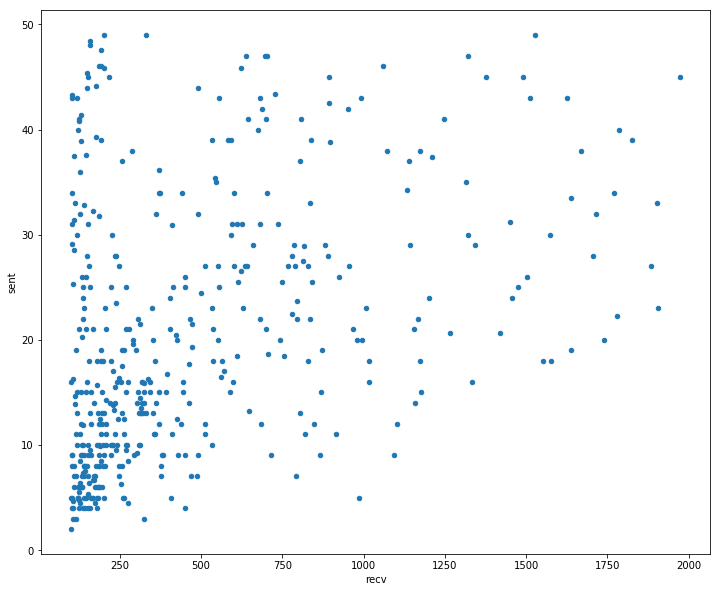

In [164]:
trafico_new_left_derecha =  trafico_new_left[(trafico_new_left['sent'] < 50 )&(trafico_new_left['recv'] > 100 )]

trafico_new_left_derecha.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.show()

In [165]:
trafico_new_left_derecha.sort('numClients',ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
108,14460,Miscellaneous secure web,jaliscotalentland2018.sched.com,619,81,443,TCP,541.654321,35.432099,0
175,19680,Miscellaneous secure web,www.google.com.mx,522,77,443,TCP,728.662338,43.337662,0
1731,13440,Google advertising,None,466,68,-,-,185.264706,31.764706,0
246,19440,Hotmail,None,1174,61,-,-,159.163934,48.409836,0
954,12480,Miscellaneous secure web,i.ytimg.com,433,54,443,TCP,499.259259,24.462963,0
1617,4500,UDP,i.ytimg.com,83,43,443,UDP,227.953488,13.837209,0
196,9120,UDP,www.google.com.mx,200,42,443,UDP,624.119048,45.880952,0
765,4380,Miscellaneous secure web,cloudfront.net,229,37,443,TCP,1133.783784,34.243243,0
63,13440,Miscellaneous secure web,cabify.com,360,34,443,TCP,534.823529,38.970588,0
606,2580,Miscellaneous secure web,api.facebook.com,90,27,443,TCP,124.629630,40.777778,0


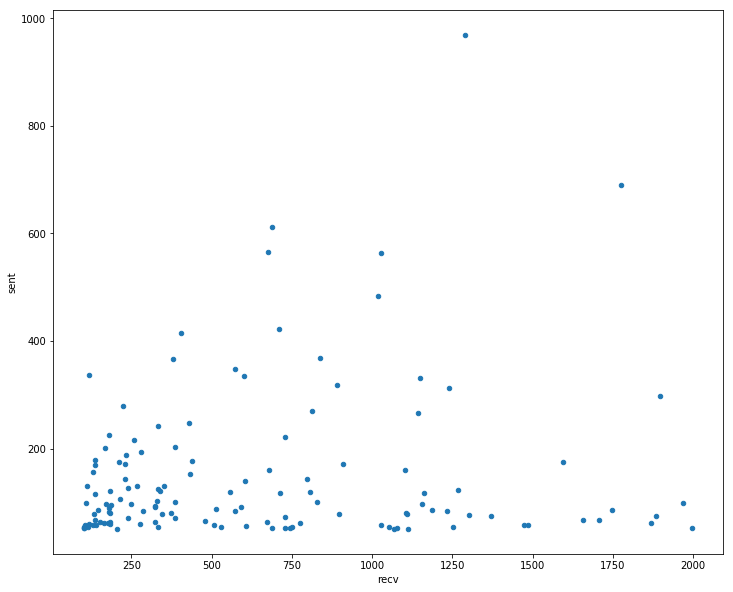

In [166]:
trafico_new_left_centro =  trafico_new_left[(trafico_new_left['sent'] > 50 )&(trafico_new_left['recv'] > 100 )]

trafico_new_left_centro.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.show()

In [167]:

trafico_new_left_centro.sort('numClients',ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
228,137880,iCloud,None,5247,355,-,-,322.802817,90.667606,0
1704,166680,Google,None,16032,216,-,-,604.083333,138.893519,0
247,73500,Gmail,None,2295,162,-,-,607.623457,55.506173,0
942,27600,Miscellaneous secure web,graph.facebook.com,636,135,443,TCP,214.748148,105.355556,0
943,24360,Miscellaneous secure web,graph.instagram.com,1120,116,443,TCP,404.500000,414.775862,0
257,49680,Windows Live Hotmail and Outlook,None,2733,109,-,-,513.743119,87.724771,0
218,57120,Google Drive,None,3438,108,-,-,676.388889,565.731481,0
953,12180,Miscellaneous secure web,i.instagram.com,601,97,443,TCP,210.979381,174.278351,0
249,30300,Twitter,None,992,93,-,-,1594.440860,174.290323,0
225,35700,Spotify,None,1008,68,-,-,1896.397059,298.073529,0


# Ranfom forest

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


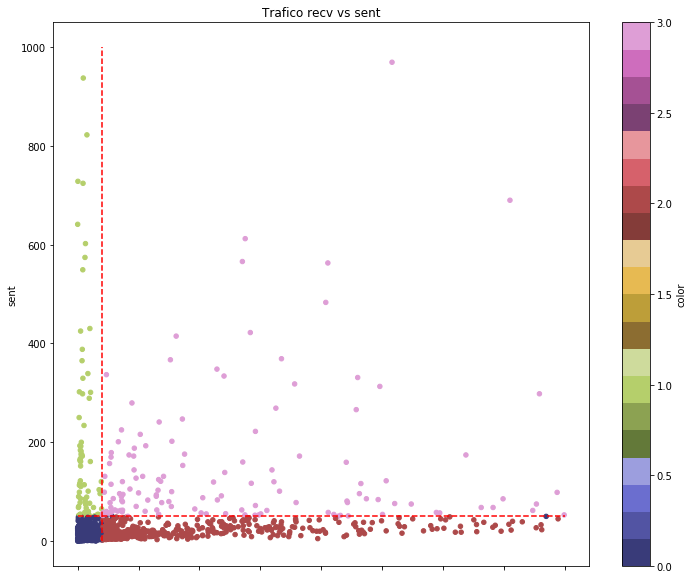

In [168]:

cm = plt.cm.get_cmap('tab20b')

trafico_new_left = trafico_new_c
trafico_new_left['color'] = 0
trafico_new_left.loc[(trafico_new_left['recv'] < 100)&(trafico_new_left['sent'] > 50),'color'] = 1
trafico_new_left.loc[(trafico_new_left['recv'] > 100)&(trafico_new_left['sent'] < 50),'color'] = 2
trafico_new_left.loc[(trafico_new_left['recv'] > 100)&(trafico_new_left['sent'] > 50),'color'] = 3
trafico_new_left.plot.scatter(x="recv",y="sent",figsize=(12,10),c='color',cmap = cm)

plt.plot([0,2000], [50,50], "r--")
plt.plot([100,100], [0,1000], "r--")

plt.title('Trafico recv vs sent')
plt.show()

In [169]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [170]:
predictors = trafico_new_left[['recv','sent']] 
targets = trafico_new_left.color

#Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.7)

#Importamos desde sklearn.ensamble, el algoritmo de Random Forest
from sklearn.ensemble import RandomForestClassifier

#Inicializamos el algoritmo Random Forest e indicamos el número de árboles que vamos a construir
classifier=RandomForestClassifier(n_estimators=25)

#Construimos el modelo sobre los datos de entrenamiento
classifier=classifier.fit(pred_train,tar_train)

#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


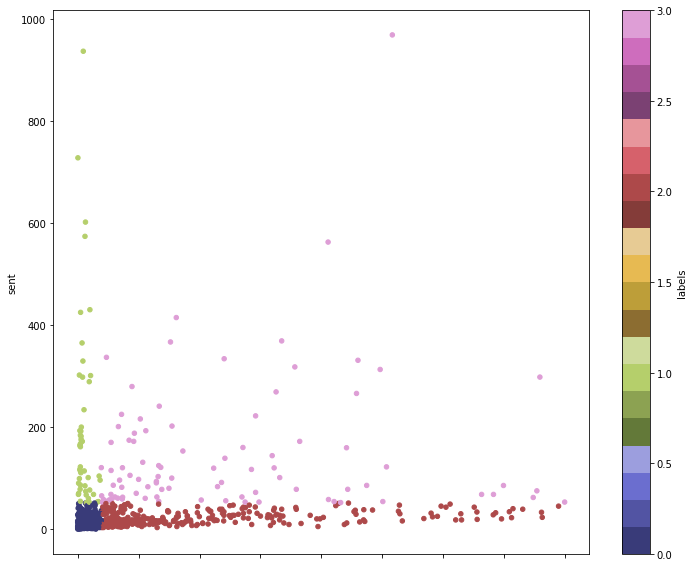

In [171]:
pred_test['labels']= predictions
pred_test.plot.scatter(x="recv",y="sent",figsize=(12,10),c='labels',cmap = cm)

# Validacion

## Carga de tablas

In [172]:
#Una muestra de la tabla se encuentra en /data
trafico = pd.read_json("validation.json")

In [173]:
trafico['recv'] = trafico['recv'] / trafico['numClients'] 
trafico['sent'] = trafico['sent'] / trafico['numClients'] 

## Graficando la informacion

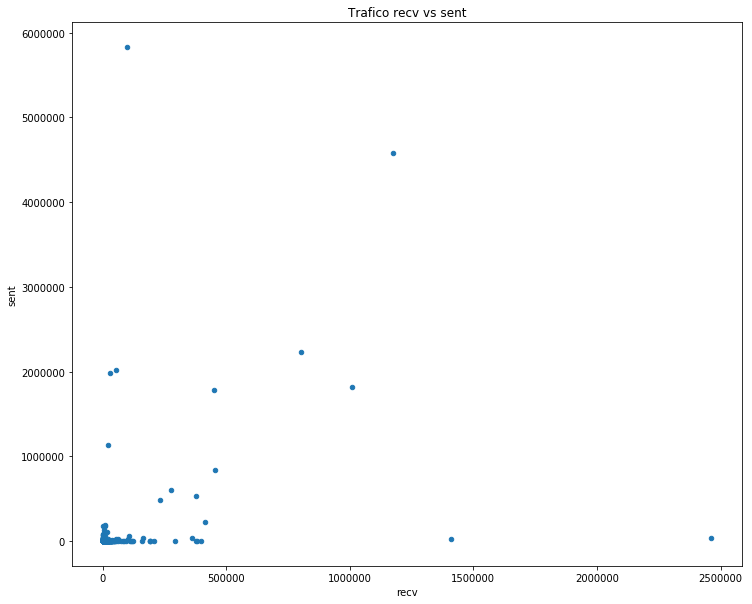

In [174]:
trafico.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

In [175]:
pred_validation  = trafico[['recv','sent']] 

#Predecimos para los valores del grupo Test
predictions2=classifier.predict(pred_validation )

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


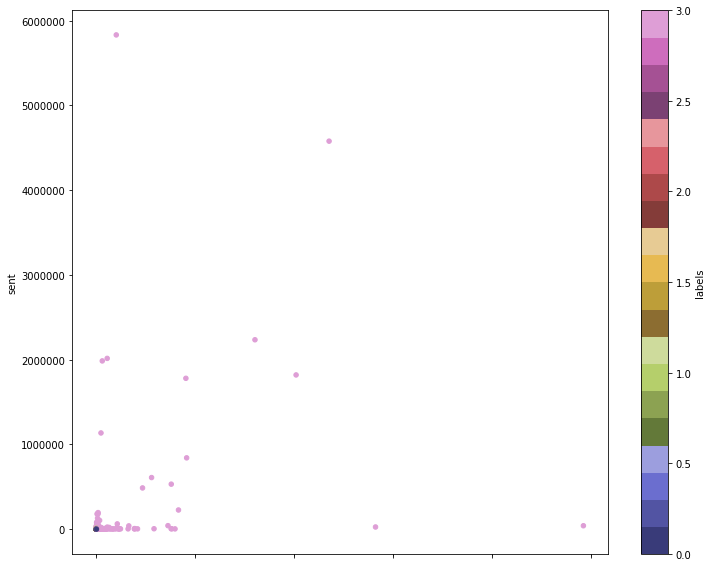

In [176]:
pred_validation['labels']= predictions2
pred_validation.plot.scatter(x="recv",y="sent",figsize=(12,10),c='labels',cmap = cm)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


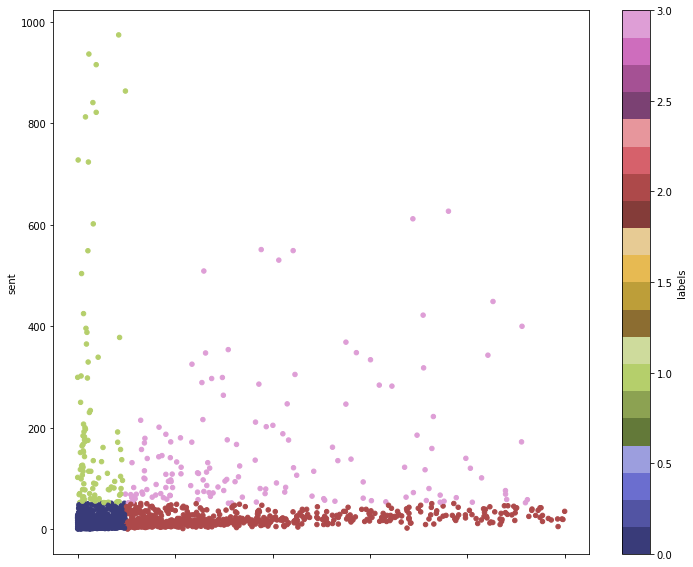

In [177]:
pred_validation['labels']= predictions2
pred_validation[(pred_validation['sent']< 1000)& (pred_validation['recv']< 1000)].plot.scatter(x="recv",y="sent",figsize=(12,10),c='labels',cmap = cm)